In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**3.3 Loading the Data**

In [ ]:
import os
import numpy as np
from PIL import Image

pre_chf_dir = '/content/drive/My Drive/ImageDataset/ImageDataset/pre-CHF'
post_chf_dir = '/content/drive/My Drive/ImageDataset/ImageDataset/post-CHF'

pre_chf_images = [os.path.join(pre_chf_dir, f) for f in os.listdir(pre_chf_dir) if f.endswith('.jpg')]
post_chf_images = [os.path.join(post_chf_dir, f) for f in os.listdir(post_chf_dir) if f.endswith('.jpg')]

all_paths = pre_chf_images + post_chf_images
labels = [0]*len(pre_chf_images) + [1]*len(post_chf_images)
labels = np.array(labels)

img_height, img_width = 150, 150

**3.4 Preprocessing and Resizing**

In [ ]:
def load_and_preprocess_images(image_paths, img_height=150, img_width=150, grayscale=True):
    data = []
    for path in image_paths:
        img = Image.open(path)
        if grayscale:
            img = img.convert('L')  # Convert to grayscale
        else:
            img = img.convert('RGB')  # Keep RGB format if needed
        img = img.resize((img_width, img_height))
        arr = np.array(img)
        data.append(arr)
    return np.array(data)

# Example: Load all images in grayscale for Flatten approach
images_gray = load_and_preprocess_images(all_paths, img_height, img_width, grayscale=True)
print("Loaded images shape:", images_gray.shape)

Loaded images shape: (3000, 150, 150)


**3.5 Storing Data for Later Steps**

In [ ]:
# If we need RGB for Conv_Flatten:
images_rgb = load_and_preprocess_images(all_paths, img_height, img_width, grayscale=False)
print("Loaded RGB images shape:", images_rgb.shape)

Loaded RGB images shape: (3000, 150, 150, 3)


**3.6 Verifying the Data**

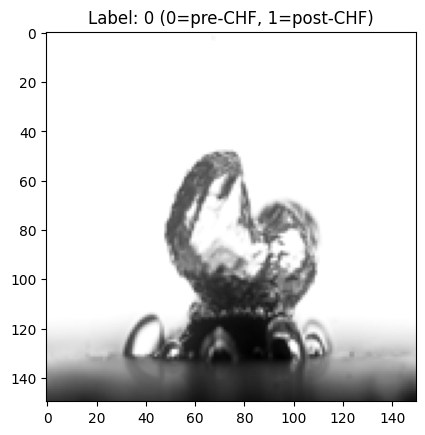

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(images_gray[0], cmap='gray')
plt.title(f"Label: {labels[0]} (0=pre-CHF, 1=post-CHF)")
plt.show()

**4.1 Flatten Approach**

In [ ]:
# Flatten images from (num_images, 150, 150) to (num_images, 22500)
num_images = images_gray.shape[0]
flatten_data = images_gray.reshape(num_images, -1)
print("Flattened data shape:", flatten_data.shape)

Flattened data shape: (3000, 22500)


**4.2 Conv_Flatten Approach**

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load VGG16 model without top layers
model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

def extract_cnn_features(images_rgb):
    features = []
    for img_arr in images_rgb:
        # Expand dimensions to create batch of size 1
        img_batch = np.expand_dims(img_arr, axis=0)
        # Preprocess for VGG16 (mean subtraction, etc.)
        img_batch = preprocess_input(img_batch)
        # Extract features
        feat = model.predict(img_batch)
        # Flatten the feature map
        feat_flat = feat.flatten()
        features.append(feat_flat)
    return np.array(features)

conv_data = extract_cnn_features(images_rgb)
print("Conv_Flatten data shape:", conv_data.shape)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1

**5.1 PCA (Principal Component Analysis)**

In [9]:
from sklearn.decomposition import PCA

def apply_pca(data, n_components=50):
    pca = PCA(n_components=n_components)
    reduced = pca.fit_transform(data)
    return reduced

# Example with flatten_data
reduced_pca_flatten = apply_pca(flatten_data, n_components=50)
print("PCA reduced shape:", reduced_pca_flatten.shape)

PCA reduced shape: (3000, 50)


**5.2 t-SNE (t-Distributed Stochastic Neighbor Embedding)**

In [10]:
from sklearn.manifold import TSNE

def apply_tsne(data, n_components=2, random_state=42):
    tsne = TSNE(n_components=n_components, random_state=random_state)
    reduced = tsne.fit_transform(data)
    return reduced

# Example with conv_data
reduced_tsne_conv = apply_tsne(conv_data)
print("t-SNE reduced shape:", reduced_tsne_conv.shape)

t-SNE reduced shape: (3000, 2)


**5.3 UMAP (Uniform Manifold Approximation and Projection)**

In [12]:
!pip install umap-learn
import umap

def apply_umap(data, n_components=2, random_state=42):
    reducer = umap.UMAP(n_components=n_components, random_state=random_state)
    reduced = reducer.fit_transform(data)
    return reduced

# Example with flatten_data
reduced_umap_flatten = apply_umap(flatten_data)
print("UMAP reduced shape:", reduced_umap_flatten.shape)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP reduced shape: (3000, 2)


**6.2 Applying K-Means to Reduced Data**

In [13]:
from sklearn.cluster import KMeans

def cluster_data(data, n_clusters=2, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(data)
    return cluster_labels

# Example: clustering Flatten+UMAP data
cluster_labels_flatten_umap = cluster_data(reduced_umap_flatten)
print("Cluster labels shape:", cluster_labels_flatten_umap.shape)

Cluster labels shape: (3000,)


**7.1 Internal Metrics**

In [14]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

def internal_metrics(data, cluster_labels):
    sil = silhouette_score(data, cluster_labels)
    db = davies_bouldin_score(data, cluster_labels)
    return sil, db

# Example:
sil, db = internal_metrics(reduced_umap_flatten, cluster_labels_flatten_umap)
print("Silhouette Score:", sil)
print("Davies-Bouldin Index:", db)

Silhouette Score: 0.42977664
Davies-Bouldin Index: 0.9771286787388244


**7.2 External Metrics**

In [15]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import contingency_matrix
import numpy as np

def purity_score(true_labels, cluster_labels):
    cont_matrix = contingency_matrix(true_labels, cluster_labels)
    return np.sum(np.amax(cont_matrix, axis=0)) / np.sum(cont_matrix)

def external_metrics(true_labels, cluster_labels):
    ari = adjusted_rand_score(true_labels, cluster_labels)
    pur = purity_score(true_labels, cluster_labels)
    return ari, pur

# Example:
ari, pur = external_metrics(labels, cluster_labels_flatten_umap)
print("Adjusted Rand Index:", ari)
print("Purity:", pur)

Adjusted Rand Index: 0.578473694986673
Purity: 0.8803333333333333


**8 Systematic Analysis**

In [16]:
# Assume we have these functions already defined:
# apply_pca(data), apply_tsne(data), apply_umap(data)
# cluster_data(data), internal_metrics(data, cluster_labels), external_metrics(true_labels, cluster_labels)

feature_extractions = {
    'Flatten': flatten_data,
    'Conv_Flatten': conv_data
}

dim_reductions = {
    'PCA': apply_pca,
    't-SNE': apply_tsne,
    'UMAP': apply_umap
}

results = []

for feat_name, feat_data in feature_extractions.items():
    for dim_name, dim_func in dim_reductions.items():
        # Apply dimensionality reduction
        reduced_data = dim_func(feat_data)

        # Cluster the reduced data
        cluster_labels = cluster_data(reduced_data, n_clusters=2)

        # Compute metrics
        sil, db = internal_metrics(reduced_data, cluster_labels)
        ari, pur = external_metrics(labels, cluster_labels)

        # Store results in a dictionary
        results.append({
            'Feature_Extraction': feat_name,
            'Dim_Reduction': dim_name,
            'Silhouette': sil,
            'Davies-Bouldin': db,
            'ARI': ari,
            'Purity': pur
        })

# Convert results to a table-like structure (optional)
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


  Feature_Extraction Dim_Reduction  Silhouette  Davies-Bouldin       ARI  \
0            Flatten           PCA    0.142622        2.682423  0.000755   
1            Flatten         t-SNE    0.432781        0.957034  0.931846   
2            Flatten          UMAP    0.429777        0.977129  0.578474   
3       Conv_Flatten           PCA    0.102321        2.747430  0.483325   
4       Conv_Flatten         t-SNE    0.463179        0.862933  0.956469   
5       Conv_Flatten          UMAP    0.625515        0.554896  0.938295   

     Purity  
0  0.516333  
1  0.982667  
2  0.880333  
3  0.847667  
4  0.989000  
5  0.984333  


**Visualization for the Best Combination**

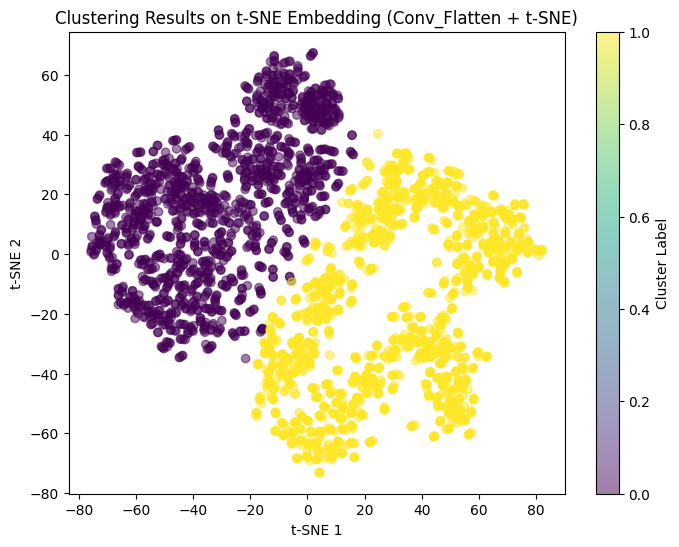

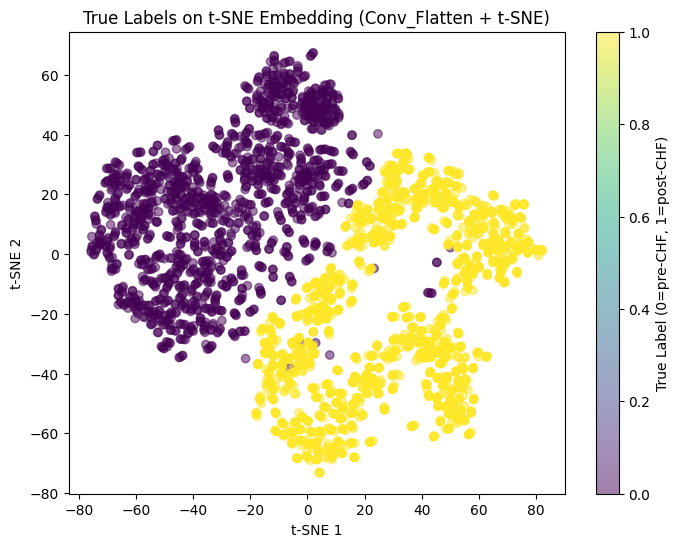

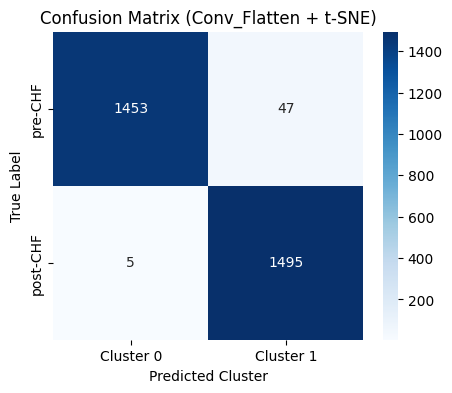

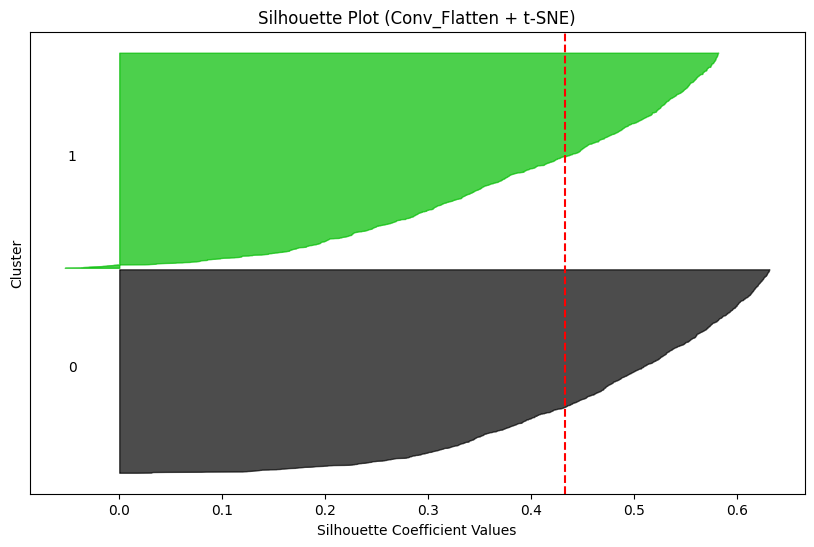

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, silhouette_samples

def apply_tsne(data, n_components=2, random_state=42):
    from sklearn.manifold import TSNE
    reducer = TSNE(n_components=n_components, random_state=random_state)
    reduced = reducer.fit_transform(data)
    return reduced

def cluster_data(data, n_clusters=2, random_state=42):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels_pred = kmeans.fit_predict(data)
    return labels_pred

def plot_silhouette(X, labels):
    from sklearn.metrics import silhouette_samples
    import matplotlib.cm as cm
    silhouette_vals = silhouette_samples(X, labels)
    cluster_labels = np.unique(labels)
    n_clusters = len(cluster_labels)
    y_lower = 10
    plt.figure(figsize=(10,6))

    for i, cluster in enumerate(cluster_labels):
        ith_cluster_silhouette_vals = silhouette_vals[labels == cluster]
        ith_cluster_silhouette_vals.sort()
        size_cluster = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster, str(cluster))
        y_lower = y_upper + 10

    plt.axvline(x=np.mean(silhouette_vals), color='red', linestyle='--')
    plt.title('Silhouette Plot (Conv_Flatten + t-SNE)')
    plt.xlabel('Silhouette Coefficient Values')
    plt.ylabel('Cluster')
    plt.yticks([])
    plt.show()

##############################################
#  - Created `flatten_data` (Flatten feature extraction)
#  - Created `labels` (true labels, 0 or 1)
#
# Now we re-run Conv_Flatten + t-SNE to get reduced_data and cluster_labels_pred
##############################################

# Run Conv_Flatten + t-SNE again
reduced_data = apply_tsne(flatten_data)
cluster_labels_pred = cluster_data(reduced_data, n_clusters=2)

# Plot clustering results
plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=cluster_labels_pred, cmap='viridis', alpha=0.5)
plt.title('Clustering Results on t-SNE Embedding (Conv_Flatten + t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Plot true labels on the same t-SNE embedding
plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels, cmap='viridis', alpha=0.5)
plt.title('True Labels on t-SNE Embedding (Conv_Flatten + t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='True Label (0=pre-CHF, 1=post-CHF)')
plt.show()

# Confusion Matrix
cm = confusion_matrix(labels, cluster_labels_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cluster 0','Cluster 1'],
            yticklabels=['pre-CHF','post-CHF'])
plt.title('Confusion Matrix (Conv_Flatten + t-SNE)')
plt.ylabel('True Label')
plt.xlabel('Predicted Cluster')
plt.show()

# Silhouette Plot
plot_silhouette(reduced_data, cluster_labels_pred)
